# Observations
1. The temperature (max temperature) is higher the closer you get to the equator. We see this in our Latitude vs Temperature plot. 
2. There is no coorelation between humidity and latitude. We see this on all three of our plots comparing latitude and humidity.
3. There is a relatively strong, positive coorelation for latitude and max temp in the southern hemisphere. Based on our graph, as latitude increases so does max temp and our r value is .77 which also shows a strong, positive coorelation.

In [10]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from api_keys import open_weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "../../../working/06-Python-APIs/Homework/Instructions/output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
#Put out data into a dataframe so we can see it
output_data_file_df = pd.read_csv(output_data_file)
output_data_file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


# Generate Cities List

In [12]:
#Create empty lists to hold lat_longs and cities
lat_lngs = []
cities = []

In [13]:
#Create a set of random latitude and longitude coordinates
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1600) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1600) 
lat_lngs = zip(lats, lngs)

In [14]:
#Identify nearest city for each lat, long coordinate
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city name is not already in our cities list, add it
    if city not in cities:
        cities.append(city)
        
len(cities)

663

In [15]:
#API Call for our cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL that we will use in our for loop
query_url = f"{url}appid={open_weather_api_key}&units={units}&q=" 

In [16]:
#Creating empty lists to add info from our API to convert to a dataframe
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
new_cities = []

#Start count and set count for our city output
count = 0
set_count = 1

print("Beginning Data Retrieval")
print("---------------------------")

#Creating a for loop to generate the url for all of our cities and store data
for city in cities:
    
    try:
        #Finding url for all of our cities
        response = requests.get(query_url + city)
        response_json = response.json()

        #Printing our cities
        print(f"Processing {count} of Set {set_count} | {city}")
        
        #Adjusting counter for our count and set count
        count += 1
        if count == 50:
            count = 0
            set_count += 1
          
        #Adding to our lists for our dataframe
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        new_cities.append(response_json['name'])
    
    #Passing on cities that are not found 
    except:
        pass
        print("City not found. Skipping...")

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")


Beginning Data Retrieval
---------------------------
Processing 0 of Set 1 | mahibadhoo
Processing 1 of Set 1 | airai
Processing 2 of Set 1 | bystrice pod hostynem
Processing 3 of Set 1 | santa cruz cabralia
Processing 4 of Set 1 | busselton
Processing 5 of Set 1 | honolulu
Processing 6 of Set 1 | bethel
Processing 7 of Set 1 | anadyr
Processing 8 of Set 1 | jamestown
Processing 9 of Set 1 | purushottampur
Processing 10 of Set 1 | hithadhoo
Processing 11 of Set 1 | huntingdon
Processing 12 of Set 1 | taolanaro
City not found. Skipping...
Processing 13 of Set 1 | kazbegi
City not found. Skipping...
Processing 14 of Set 1 | kupang
Processing 15 of Set 1 | bilibino
Processing 16 of Set 1 | soe
Processing 17 of Set 1 | port alfred
Processing 18 of Set 1 | chokurdakh
Processing 19 of Set 1 | guerrero negro
Processing 20 of Set 1 | bambous virieux
Processing 21 of Set 1 | sitka
Processing 22 of Set 1 | maridi
Processing 23 of Set 1 | nizhneyansk
City not found. Skipping...
Processing 24 of S

Processing 25 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing 26 of Set 5 | portsmouth
Processing 27 of Set 5 | vao
Processing 28 of Set 5 | klyuchi
Processing 29 of Set 5 | castro
Processing 30 of Set 5 | linxia
Processing 31 of Set 5 | hualmay
Processing 32 of Set 5 | fairbanks
Processing 33 of Set 5 | verkhoyansk
Processing 34 of Set 5 | saint george
Processing 35 of Set 5 | taloqan
Processing 36 of Set 5 | tilichiki
Processing 37 of Set 5 | kununurra
Processing 38 of Set 5 | chilliwack
Processing 39 of Set 5 | warqla
City not found. Skipping...
Processing 40 of Set 5 | camacha
Processing 41 of Set 5 | shingu
Processing 42 of Set 5 | monforte de lemos
Processing 43 of Set 5 | bonthe
Processing 44 of Set 5 | pirovskoye
Processing 45 of Set 5 | danielskuil
Processing 46 of Set 5 | ambodifototra
City not found. Skipping...
Processing 47 of Set 5 | bidar
Processing 48 of Set 5 | carupano
Processing 49 of Set 5 | longyearbyen
Processing 0 of Set 6 | iqaluit
Processing 1 of

Processing 1 of Set 10 | uwajima
Processing 2 of Set 10 | scarborough
Processing 3 of Set 10 | kailua
Processing 4 of Set 10 | havre-saint-pierre
Processing 5 of Set 10 | zalantun
Processing 6 of Set 10 | kurchum
Processing 7 of Set 10 | south river
Processing 8 of Set 10 | acurenam
Processing 9 of Set 10 | were ilu
Processing 10 of Set 10 | port lincoln
Processing 11 of Set 10 | gezing
Processing 12 of Set 10 | bereda
Processing 13 of Set 10 | thibodaux
Processing 14 of Set 10 | kabare
Processing 15 of Set 10 | dengzhou
Processing 16 of Set 10 | victoria
Processing 17 of Set 10 | buzmeyin
Processing 18 of Set 10 | kokoda
Processing 19 of Set 10 | vung tau
Processing 20 of Set 10 | loiza
Processing 21 of Set 10 | staryy nadym
Processing 22 of Set 10 | puri
Processing 23 of Set 10 | gbarnga
Processing 24 of Set 10 | flinders
Processing 25 of Set 10 | loubomo
Processing 26 of Set 10 | copiapo
Processing 27 of Set 10 | sisimiut
Processing 28 of Set 10 | northport
Processing 29 of Set 10 |

In [17]:
#Create a dataframe with city information

city_df = pd.DataFrame(
    {"City": new_cities,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Humidity": humidity,
     "Cloudiness": cloud,
     "Wind Speed": wind_speed,
     "Country": country,
     "Date": date
    }      
)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahibadhoo,3.7833,72.9667,28.49,66,38,1.82,MV,1619903786
1,Airai,-8.9266,125.4092,13.45,89,94,1.51,TL,1619903787
2,Bystřice pod Hostýnem,49.3992,17.6740,10.56,86,87,1.79,CZ,1619903787
3,Santa Cruz Cabrália,-16.2781,-39.0247,22.00,83,75,2.06,BR,1619903787
4,Busselton,-33.6500,115.3333,13.33,96,7,1.33,AU,1619903788
...,...,...,...,...,...,...,...,...,...
609,Constitución,-35.3333,-72.4167,12.70,96,100,2.01,CL,1619903962
610,San Cristobal,7.7669,-72.2250,26.00,94,75,1.54,VE,1619903835
611,Yangmei,24.1023,112.5618,20.95,88,100,0.51,CN,1619903963
612,Poronaysk,49.2167,143.1167,2.15,79,100,7.68,RU,1619903963


In [18]:
#Saving dataframe as a csv file
#city_df.to_csv("city_info.csv", encoding="utf-8", index = False)

In [19]:
#Determining if any of our cities have over 100% humidity
humidity_percent = city_df.loc[city_df["Humidity"] > 100]
humidity_percent

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [20]:
#If there is humidity over 100, drop it

# Plots

### Latitude and Max Temp

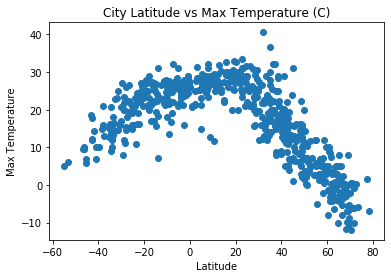

In [21]:
#Scatter plot for latitude and max temp
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature (C)")
plt.savefig('latitude_maxtemp.png')

### Observations for Latitude and Max Temp
We are seeing how a city's location affects the temperature. As the latitude gets closer to 0, the temperate increases. Then as the latitude gets father away from 0, the max temperature decreases. What this is telling us is that as you get closer to the equator the max temperate increases and as you get farther away the max temperature is lower.

### Latitude and Percent Humidity

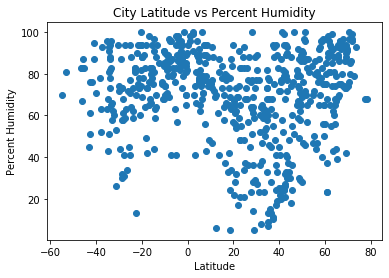

In [22]:
#Scatter plot for Lat and humidity
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("City Latitude vs Percent Humidity")
plt.savefig('latitude_humidity.png')

### Observation for Latitude and Percent Humidity
We are analyzing whether or not a city's latitude affects how humid it will be. It appears there is generally higher humidity for the Southern Hemisphere, but there is no strong coorelation.

### Latitude and Percent Cloudiness

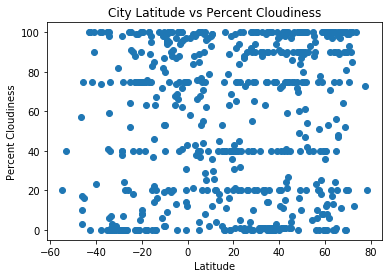

In [23]:
#Scatter plot for Lat and cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
plt.title("City Latitude vs Percent Cloudiness")
plt.savefig('latitude_cloudiness.png')

### Observation for Latitude and Percent Cloudiness
We are analyzing if a city's location determines how cloudy it will or will not be. There is no coorelation between latitude and percent cloudiness.

### Latitude and Wind Speed

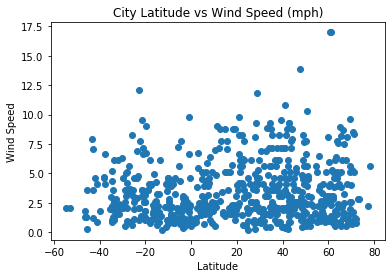

In [24]:
#Scatter plot for Lat and wind speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (mph)")
plt.savefig('latitude_windspeed.png')

### Observations of Latitude and Wind Speed
There is little to no coorelation between latitude and wind speed. As the latitude gets close to 40 and increases, there are more cities with higher wind speeds. However, overall there is not a strong coorelation.

In [25]:
#New DataFrame for Northern Hemisphere
northern_hem_df = city_df.loc[city_df["Lat"] >= 0]
northern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahibadhoo,3.7833,72.9667,28.49,66,38,1.82,MV,1619903786
2,Bystřice pod Hostýnem,49.3992,17.6740,10.56,86,87,1.79,CZ,1619903787
5,Honolulu,21.3069,-157.8583,28.00,54,40,5.66,US,1619903703
6,Bethel,41.3712,-73.4140,17.22,25,1,4.12,US,1619903788
7,Anadyr,64.7500,177.4833,-10.00,79,40,5.00,RU,1619903788
...,...,...,...,...,...,...,...,...,...
603,Grand-Santi,4.2500,-54.3833,25.11,96,66,1.45,GF,1619903961
608,Bisoca,45.5333,26.7000,10.00,60,99,2.26,RO,1619903962
610,San Cristobal,7.7669,-72.2250,26.00,94,75,1.54,VE,1619903835
611,Yangmei,24.1023,112.5618,20.95,88,100,0.51,CN,1619903963


In [26]:
#New DataFrame for Southern Hemisphere
southern_hem_df = city_df.loc[city_df["Lat"] < 0]
southern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Airai,-8.9266,125.4092,13.45,89,94,1.51,TL,1619903787
3,Santa Cruz Cabrália,-16.2781,-39.0247,22.00,83,75,2.06,BR,1619903787
4,Busselton,-33.6500,115.3333,13.33,96,7,1.33,AU,1619903788
10,Hithadhoo,-0.6000,73.0833,28.96,70,75,2.28,MV,1619903789
12,Kupang,-10.1667,123.5833,23.94,84,2,3.94,ID,1619903790
...,...,...,...,...,...,...,...,...,...
605,Ilo,-17.6394,-71.3375,20.00,73,0,4.12,PE,1619903837
606,Santa Isabel Rio Negro,-0.4139,-65.0192,26.83,90,43,1.23,BR,1619903961
607,Madimba,-10.4000,40.3333,24.79,91,19,3.53,TZ,1619903962
609,Constitución,-35.3333,-72.4167,12.70,96,100,2.01,CL,1619903962


### Northern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7607190391806304


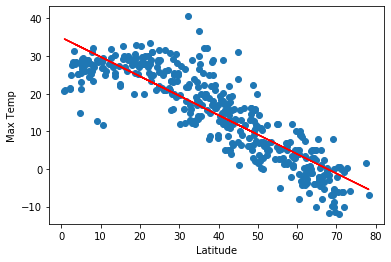

<Figure size 432x288 with 0 Axes>

In [28]:
#Linear Regression for latitude and max temp for northern hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue **2}") 
plt.show()
plt.savefig('northern_latitude_maxtemp.png')

### Observations
There is a negative coorelation between latitude and max temperature in the northern hemisphere.

### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-value is: 0.7399258836204563


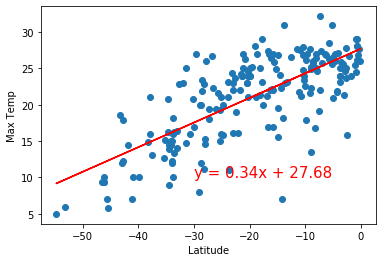

<Figure size 432x288 with 0 Axes>

In [29]:
#Linear Regression for latitude and max temp for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('southern_latitude_maxtemp.png')

### Observation
There is a positive coorelation between latitude and max temp in the southern hemisphere.

### Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12113390076036873


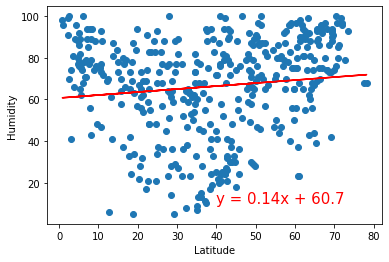

<Figure size 432x288 with 0 Axes>

In [30]:
#Linear Regression for latitude and humidity for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('northern_latitude_humidity.png')

### Observations
There is no coorelation between humidity and latitude in the northern hemisphere.

### Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27479497725871466


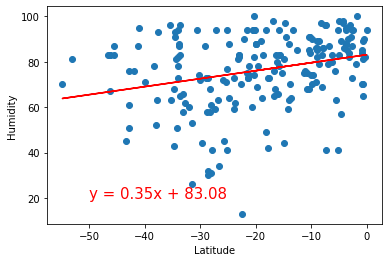

<Figure size 432x288 with 0 Axes>

In [31]:
#Linear Regression for latitude and humidity for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('southern_latitude_humidity.png')

### Observation
There is little to no coorelation between latitude and humidity in the southern hemisphere. As latitude increases and gets closer to 0, there is a slight increase in humidity, but it is not a strong coorelation.

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12519563564686087


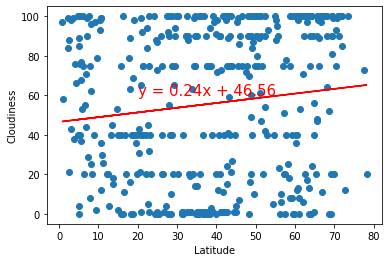

<Figure size 432x288 with 0 Axes>

In [32]:
#Linear Regression for latitude and cloudiness for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('northern_latitude_cloudiness.png')

### Observations
There is no coorelation between latitude and cloudiness in the northern hemisphere.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26625334725331273


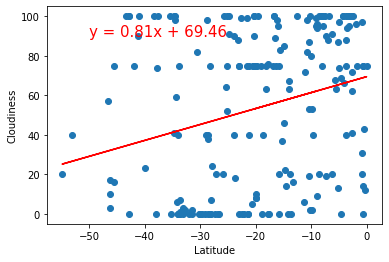

<Figure size 432x288 with 0 Axes>

In [33]:
#Linear Regression for latitude and cloudiness for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('southern_latitude_cloudiness.png')

### Observation
There is no coorelation between latitude and cloudiness in the southern hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01570947253005363


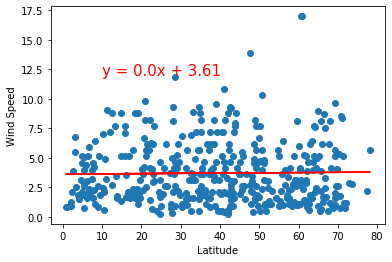

<Figure size 432x288 with 0 Axes>

In [34]:
#Linear Regression for latitude and wind speed for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('northern_latitude_windspeed.png')

### Observation
The wind speed in the northern hemisphere is higher than in the southern hemisphere. However, in the north hemisphere there is virtually no coorelation between latitude and wind speed.

The r-value is: -0.11455661942380645


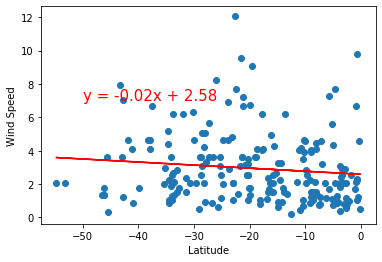

<Figure size 432x288 with 0 Axes>

In [35]:
#Linear Regression for latitude and wind speed for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}") 
plt.show()
plt.savefig('southern_latitude_windspeed.png')

### Observation
The wind speed is lower in the southern hemisphere than in the northern. As you get closer to the equator there is a slight decrease in wind speed.